# **ZEOTAP ASSIGNMENT**
## **Task 1: EDA**

# **Libraries 📚**

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

# **Loading The Dataset** 💿.

In [33]:
customers = pd.read_csv("/content/Customers (1).csv")
products = pd.read_csv("/content/Products (1).csv")
transactions = pd.read_csv("/content/Transactions.csv")

# **sample of the data**

In [34]:
print("\nCustomers Head:\n", customers.head())
print("\nProducts Head:\n", products.head())
print("\nTransactions Head:\n", transactions.head())


Customers Head:
   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Head:
   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Head:
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0

# **Checking for null** 👀

In [35]:
print("\nMissing Values:\n")
print("Customers:\n", customers.isnull().sum())
print("Products:\n", products.isnull().sum())
print("Transactions:\n", transactions.isnull().sum())


Missing Values:

Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


# **Checking For Duplicates** 👩👩

In [36]:
print("\nDuplicate Values:\n")
print("Customers:\n", customers.duplicated().sum())
print("Products:\n", products.duplicated().sum())
print("Transactions:\n", transactions.duplicated().sum())


Duplicate Values:

Customers:
 0
Products:
 0
Transactions:
 0


# **Merging the Data into one** 🧩

In [37]:
cust_trans = pd.merge(transactions, customers, on='CustomerID')
cust_trans.head(5)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15


In [55]:
df = pd.merge(cust_trans, products, on='ProductID', suffixes=('_transactions', '_products'))
df.head(5)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_transactions,CustomerName,Region,SignupDate,ProductName,Category,Price_products
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TransactionID       1000 non-null   object 
 1   CustomerID          1000 non-null   object 
 2   ProductID           1000 non-null   object 
 3   TransactionDate     1000 non-null   object 
 4   Quantity            1000 non-null   int64  
 5   TotalValue          1000 non-null   float64
 6   Price_transactions  1000 non-null   float64
 7   CustomerName        1000 non-null   object 
 8   Region              1000 non-null   object 
 9   SignupDate          1000 non-null   object 
 10  ProductName         1000 non-null   object 
 11  Category            1000 non-null   object 
 12  Price_products      1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB


Checking whether Price_transaction and price_products are same. If both are same we can drop a column

In [40]:
df['Price_check'] = df['Price_transactions'] == df['Price_products']  # Creates a column to check equality
df['Price_check'].value_counts()

,count
Price_check,
True,1000


Since bothe the price values are not different, we can drop any one price column along with the column 'Price_check'.

In [41]:
df.drop(columns=['Price_products','Price_check'], inplace=True)

In [42]:
# renaming the price_transaction column as price
df.rename(columns={'Price_transactions':'Price'}, inplace=True)

# **Fixing the DataType** 🗓

In [43]:
# Data type conversion for dates
df['SignupDate'] = pd.to_datetime(df['SignupDate'], errors='coerce')
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')

In [44]:
# fixing the date datatype
# df['TransactionDate'] = pd.to_datetime(df['TransactionDate']).dt.strftime('%Y-%m-%d')
# df['SignupDate'] = pd.to_datetime(df['SignupDate']).dt.strftime('%Y-%m-%d')
# df.head(5)

In [45]:
# Descriptive Statistics
df.describe()

,TransactionDate,Quantity,TotalValue,Price,SignupDate
count,1000,1000.000000,1000.000000,1000.00000,1000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407,2023-07-09 02:49:55.199999744
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000,2022-01-22 00:00:00
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000,2022-09-17 12:00:00
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000,2023-07-23 00:00:00
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000,2024-04-12 00:00:00
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000,2024-12-28 00:00:00
std,NaN,1.117981,493.144478,140.73639,NaN


In [46]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.head(3)

,Quantity,TotalValue,Price
0,1,300.68,300.68
1,1,300.68,300.68
2,1,300.68,300.68


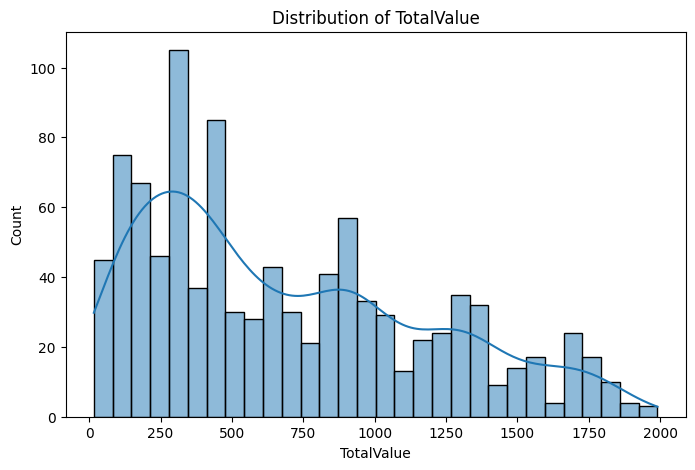

In [47]:
# Univariate Analysis
plt.figure(figsize=(8, 5))
sns.histplot(df["TotalValue"], bins=30, kde=True)
plt.title("Distribution of TotalValue")
plt.show()

In [48]:
df['Category'].value_counts()

,count
Category,
Books,270
Electronics,254
Home Decor,248
Clothing,228


In [49]:
df.groupby('Category')["ProductName"].value_counts()

Category    ProductName           
Books       BookWorld Biography       30
            SoundWave Cookbook        29
            TechPro Textbook          25
            ActiveWear Textbook       23
            BookWorld Cookbook        20
                                      ..
Home Decor  TechPro Rug               10
            ComfortLiving Rug          8
            BookWorld Cookware Set     7
            BookWorld Rug              7
            BookWorld Wall Art         7
Name: count, Length: 66, dtype: int64

<ipython-input-50-92c5e29c4cee>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x='Category', y='TotalValue', palette='viridis')


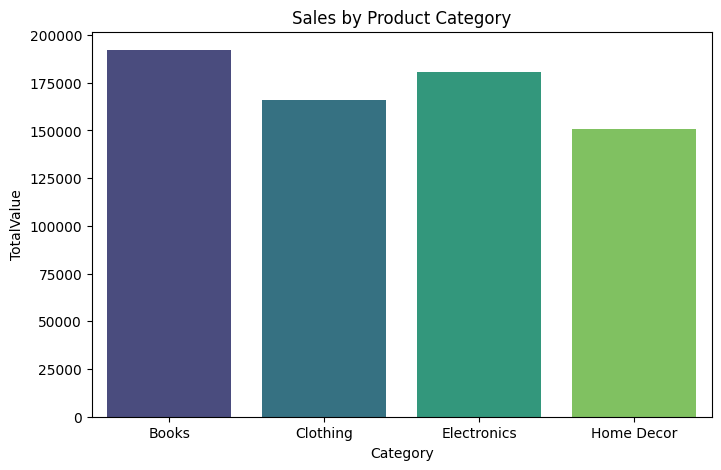

In [50]:
category_sales = df.groupby('Category')['TotalValue'].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=category_sales, x='Category', y='TotalValue', palette='viridis')
plt.title('Sales by Product Category')
plt.show()

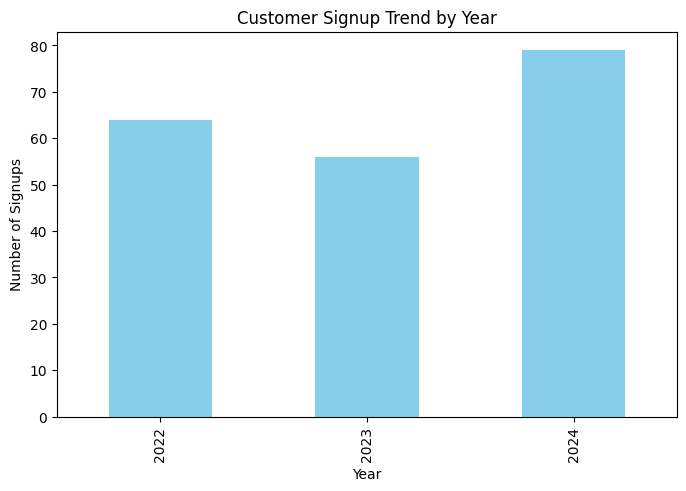

In [52]:
# Group by year and plot customer acquisition trend
signup_trend = df.groupby(df['SignupDate'].dt.year)['CustomerID'].nunique()
signup_trend.plot(kind='bar', figsize=(8, 5), color='skyblue')
plt.title('Customer Signup Trend by Year')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.show()

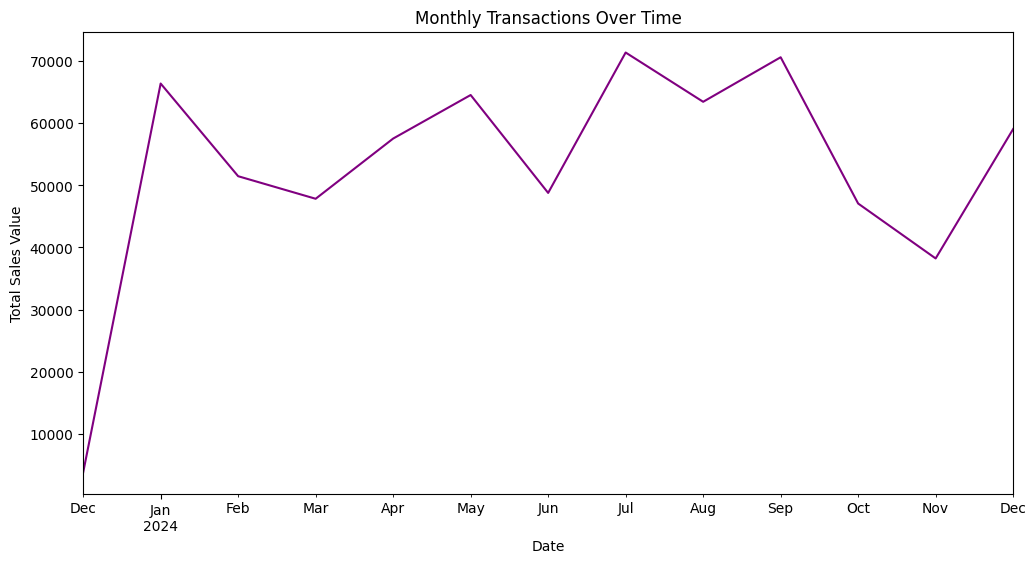

In [54]:
# Group by month and sum the total transaction values
transactions_trend = df.groupby(df['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()

# Plot the transactions trend
transactions_trend.plot(kind='line', figsize=(12, 6), color='purple')
plt.title('Monthly Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Value')
plt.show()

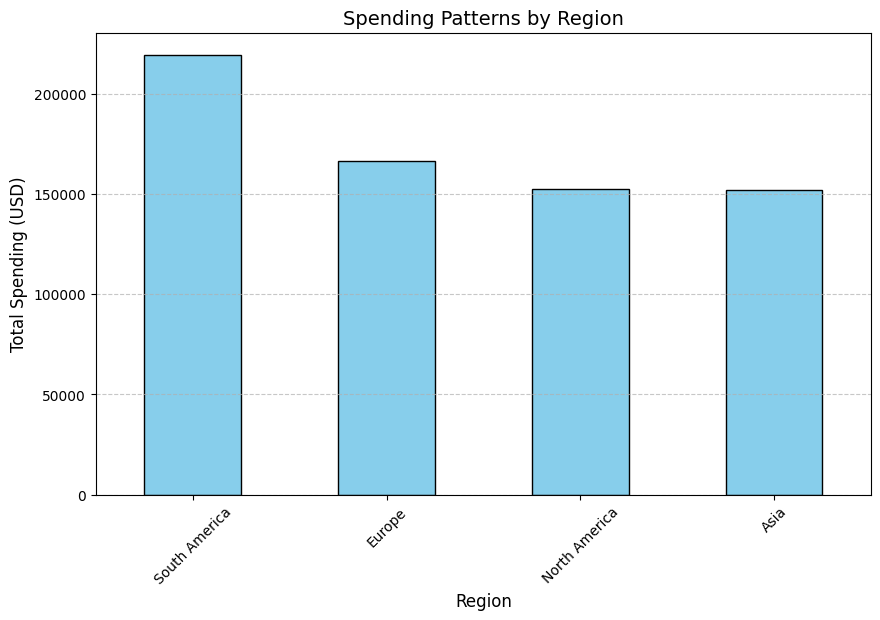

In [56]:
# Group by Region and calculate total spending
spending_by_region = df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

# Plot the spending patterns
spending_by_region.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title('Spending Patterns by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Spending (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-57-16d048c31265>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x='TotalValue', y='CustomerName', palette='Blues_r')


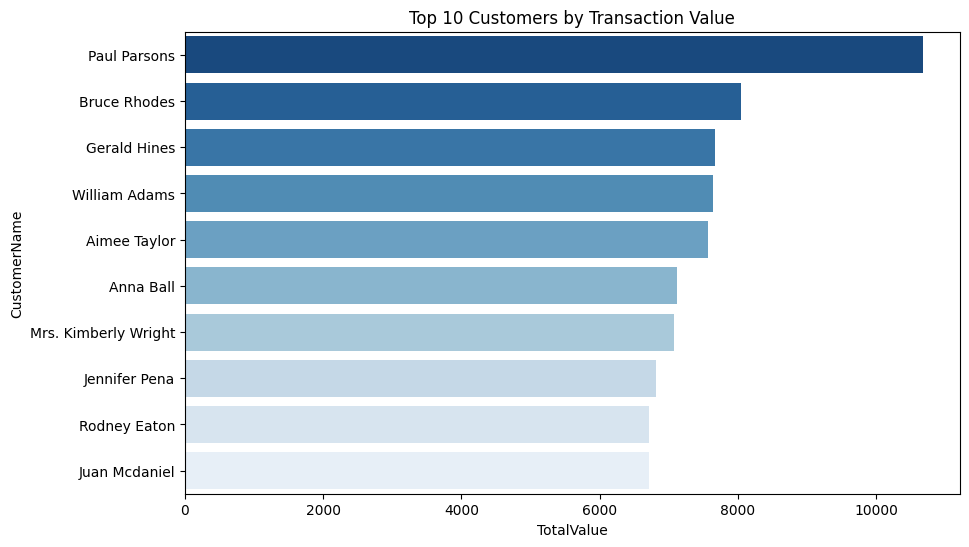

In [57]:
# Top customers by transaction value
top_customers = df.groupby('CustomerName')['TotalValue'].sum().reset_index()
top_customers = top_customers.sort_values(by='TotalValue', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_customers, x='TotalValue', y='CustomerName', palette='Blues_r')
plt.title('Top 10 Customers by Transaction Value')
plt.show()

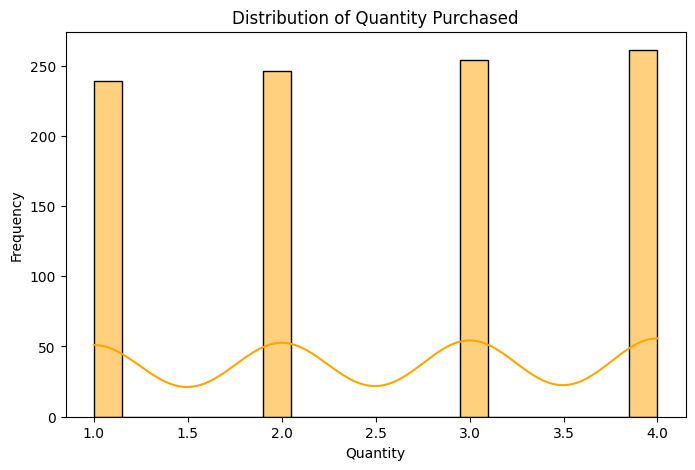

In [59]:
# Quantity distribution analysis
plt.figure(figsize=(8, 5))
sns.histplot(df['Quantity'], bins=20, color='orange', kde=True)
plt.title('Distribution of Quantity Purchased')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

# **Business Insights Derived From EDA** 🔎

1. The histogram shows that the distribution of TotalValue is right-skewed.
A majority of transactions fall in the lower spending range (e.g., below 500),
 with fewer transactions exceeding 1000. A small number of transactions contribute to very high TotalValue (e.g., above 1500). These could represent bulk purchases or high-value customers.
2. The Books category has the highest total sales, surpassing all other categories. This suggests that books are in high demand, possibly due to strong customer interest, seasonal promotions, or recurring purchases. The Electronics category follows closely behind Books in total sales.
This could indicate a consistent customer base and high-value products contributing significantly to revenue.The Clothing and Home Decor categories have lower total sales compared to Books and Electronics.
3. There's roughly a $70,000 gap between the highest (South America) and lowest (Asia) spending regions. The middle markets (Europe and North America) show only small differences in spending, indicating similar market maturity. Europe's second-place position suggests potential for growth to match South American levels.
4. Peak sales occur in July-August (around 70,000 in value)
Secondary peak in January 2024 (approximately 65,000)
Lowest points in November-December (dropping to around 40,000)
Clear seasonal fluctuations throughout the year. Need for seasonal inventory planning to match peak periods and have to implement strategies to boost sales during low periods.Consider marketing campaigns to minimize depth of seasonal troughs.
5. The number of customer signups has shown a general upward trend from 2022 to 2024. 2024 has the highest number of signups, indicating growing customer interest and engagement. The upward trend in 2024 suggests growing brand awareness and customer acquisition success. Analyzing customer retention rates alongside signup trends will provide deeper insights. Further segmentation of signup sources (e.g., region, platform, referral source) could help optimize future strategies.

Analysed by
Malarvizhi Kandhasamy